## Тема “Обучение без учителя”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [14]:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate= 250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

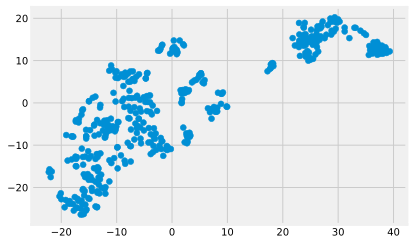

In [18]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.style.use('fivethirtyeight')

plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

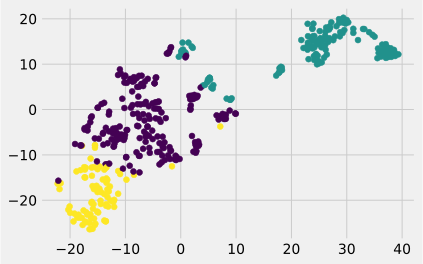

In [20]:
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [21]:
print('средняя цена в 1м кластере: {}'.format(y_train[labels_train == 0].mean()))
print('средняя цена во 2м кластере: {}'.format(y_train[labels_train == 1].mean()))
print('средняя цена в 3м кластере: {}'.format(y_train[labels_train == 2].mean()))

средняя цена в 1м кластере: 24.958115183246072
средняя цена во 2м кластере: 16.165354330708663
средняя цена в 3м кластере: 27.78837209302326


In [22]:
print('среднее CRIME в 1м кластере: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('среднее CRIME во 2м кластере: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('среднее CRIME в 3м кластере: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

среднее CRIME в 1м кластере: 0.42166020942408367
среднее CRIME во 2м кластере: 10.797028425196853
среднее CRIME в 3м кластере: 0.07356558139534886


## *Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [23]:
labels_test = kmeans.predict(X_test_scaled)

print('средняя цена в 1м кластере: {}'.format(y_test[labels_test == 0].mean()))
print('средняя цена во 2м кластере: {}'.format(y_test[labels_test == 1].mean()))
print('средняя цена в 3м кластере: {}'.format(y_test[labels_test == 2].mean()))


средняя цена в 1м кластере: 21.860784313725492
средняя цена во 2м кластере: 16.43714285714286
средняя цена в 3м кластере: 31.35


In [24]:
print('среднее CRIME в 1м кластере: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('среднее CRIME во 2м кластере: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('среднее CRIME в 3м кластере: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))


среднее CRIME в 1м кластере: 0.26607882352941176
среднее CRIME во 2м кластере: 10.165531142857143
среднее CRIME в 3м кластере: 0.062060000000000004
